## Project: Evaluation of Student Performance

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#split'>Split Data</a></li>
<li><a href='#model'>Train Model</a></li>
<li><a href="#con">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this dataset, you will find information related to credit card use for a sample of 300 credit card holders.

### Columns Description

`ID`: Identification of Credit Card holder (Categorical).
<br>`Income (1000)`: Credit card income in thousands
<br>`Limit`: Limit of Credit Card for user
<br>`Rating`: Customer evaluation
<br>`Cards`: type of card
<br>`Age`: the age 
<br>`Education (years completed)`: how many years completed in education?
<br>`Gender`: Gender F , M
<br>`Student`:does the person a student or not?
<br>`Married`: does the person married or not?
<br>`Ethnicity`: The ethnic origins of the card holder
<br>`Balance`: Balance amount left in their account to make purchases
<br>`Missed`: Did you get the card or not?

<a id='wrangling'></a>
## Data Wrangling

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('CreditCard.csv')

In [4]:
data.head()

ID  Income ($1000)  Limit  Rating  Cards  Age  Education (years completed)  \
0   1          14.891   3606     283      2   34                           11   
1   2         106.025   6645     483      3   82                           15   
2   3         104.593   7075     514      4   71                           11   
3   4         148.924   9504     681      3   36                           11   
4   5          55.882   4897     357      2   68                           16   

   Gender Student Married  Ethnicity  Balance  Missed  
0    Male      No     Yes  Caucasian      333       1  
1  Female     Yes     Yes      Asian      903       0  
2    Male      No      No      Asian      580       0  
3  Female      No      No      Asian      964       0  
4    Male      No     Yes  Caucasian      331       0

In [5]:
def show_columns(df):
    for i in df.columns:
        print(i)
show_columns(data)

ID
Income ($1000)
Limit
Rating
Cards
Age
Education (years completed)
Gender
Student
Married
Ethnicity
Balance
Missed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           299 non-null    int64  
 1   Income ($1000)               299 non-null    float64
 2   Limit                        299 non-null    int64  
 3   Rating                       299 non-null    int64  
 4   Cards                        299 non-null    int64  
 5   Age                          299 non-null    int64  
 6   Education (years completed)  299 non-null    int64  
 7   Gender                       299 non-null    object 
 8   Student                      299 non-null    object 
 9   Married                      299 non-null    object 
 10  Ethnicity                    299 non-null    object 
 11  Balance                      299 non-null    int64  
 12  Missed                       299 non-null    int64  
dtypes: float64(1), int64

In [7]:
data.describe()

ID  Income ($1000)         Limit      Rating       Cards  \
count  299.000000      299.000000    299.000000  299.000000  299.000000   
mean   150.000000       44.118391   4626.561873  348.036789    3.026756   
std     86.458082       33.901658   2244.384602  151.118121    1.353328   
min      1.000000       10.354000    855.000000   93.000000    1.000000   
25%     75.500000       21.017000   2961.000000  235.000000    2.000000   
50%    150.000000       33.214000   4433.000000  339.000000    3.000000   
75%    224.500000       56.069000   5798.000000  433.000000    4.000000   
max    299.000000      186.634000  13414.000000  949.000000    8.000000   

              Age  Education (years completed)      Balance      Missed  
count  299.000000                   299.000000   299.000000  299.000000  
mean    54.913043                    13.401338   501.989967    0.705686  
std     17.202675                     3.077216   467.618136    0.456498  
min     24.000000                     5.000000     0.000000    0.000000  
25%     41.000000                    11.000000    15.500000    0.000000  
50%     55.000000                    14.000000   431.000000    1.000000  
75%     69.000000                    16.000000   859.500000    1.000000  
max     91.000000                    20.000000  1809.000000    1.000000

## Data Cleaning

>01- Exploring nulls and remove it
<br>02- Exploring duplicates and remove it
<br>03- drop data that don't have any impact on output

#### 01- Exploring nulls and remove it

In [8]:
data.isnull().sum()

ID                             0
Income ($1000)                 0
Limit                          0
Rating                         0
Cards                          0
Age                            0
Education (years completed)    0
Gender                         0
Student                        0
Married                        0
Ethnicity                      0
Balance                        0
Missed                         0
dtype: int64

The data we have it don't have nulls value

#### 02- Exploring duplicates and remove it

In [9]:
data.duplicated().sum()

0

The data we have it don't have duplicate data

#### 03- drop data that don't have any impact on output

In [10]:
new_dt=data.drop(columns='ID')

<a id='eda'></a>
## Exploratory Data Analysis

how many clients are missing cards?

In [11]:
miss_count=new_dt['Missed'].value_counts()

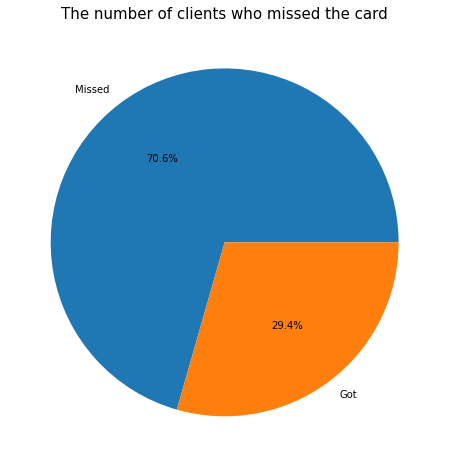

In [18]:
plt.figure(figsize=(16,8))
plt.title('The number of clients who missed the card',size=15)
plt.pie(miss_count,labels=['Missed', 'Got'],autopct='%.01f%%')
plt.show()

descripative statistics for balance 

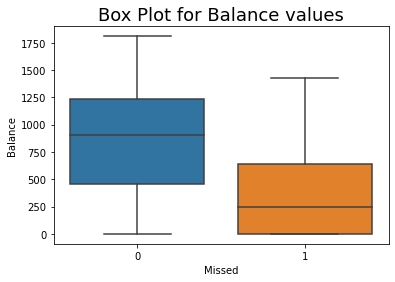

In [37]:
plt.figure(figsize=(6,4))
plt.title('Box Plot for Balance values',size=18)
sns.boxplot(x='Missed',y='Balance',data=new_dt)
plt.show()

from above there is strong correlation between Missed and Balance in credit card

In [ ]:
Income ($1000)
Limit
Rating
Cards
Age
Education (years completed)
Gender
Student
Married
Ethnicity
Balance
Missed

#### Split data into categorical and numerical data 

Categorical Columns

In [38]:
cat=new_dt.select_dtypes('object')
show_columns(cat)

Gender
Student
Married
Ethnicity


#### Then we will analysis and visualize all columns with Missed columns to define correlation

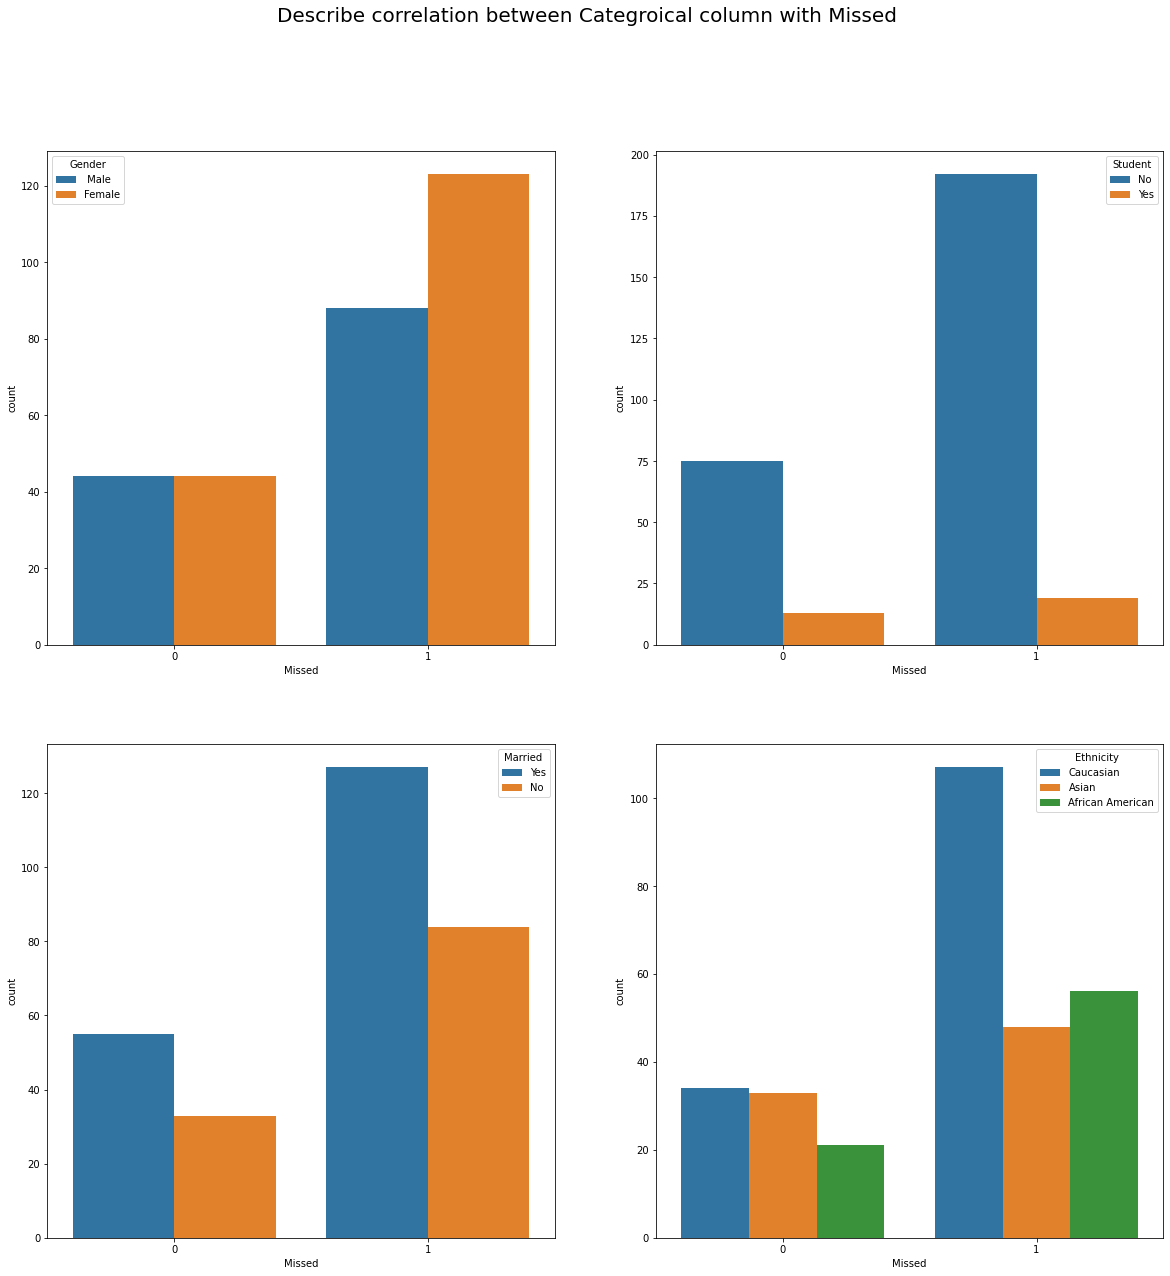

In [40]:
plt.figure(figsize=(20,20))
plt.suptitle('Describe correlation between Categroical column with Missed',size=20)
for i in range(len(cat.columns)):
    plt.subplot(2,2,i+1)
    sns.countplot(x='Missed',hue=cat.columns[i],data=new_dt)

`Gender`: if was female maybe miss credit more than men
<br>`Student`: it has no impact on missed vales
<br>`Married`: it has no impact on missed values 
<br>`Ethnicity`: when it is African American maybe miss credit more than others

Numerical columns

In [41]:
num=new_dt.select_dtypes(['int64','float64'])
show_columns(num)

Income ($1000)
Limit
Rating
Cards
Age
Education (years completed)
Balance
Missed


In [42]:
num.drop(columns=['Balance','Missed'],inplace=True)

In [43]:
show_columns(num)

Income ($1000)
Limit
Rating
Cards
Age
Education (years completed)


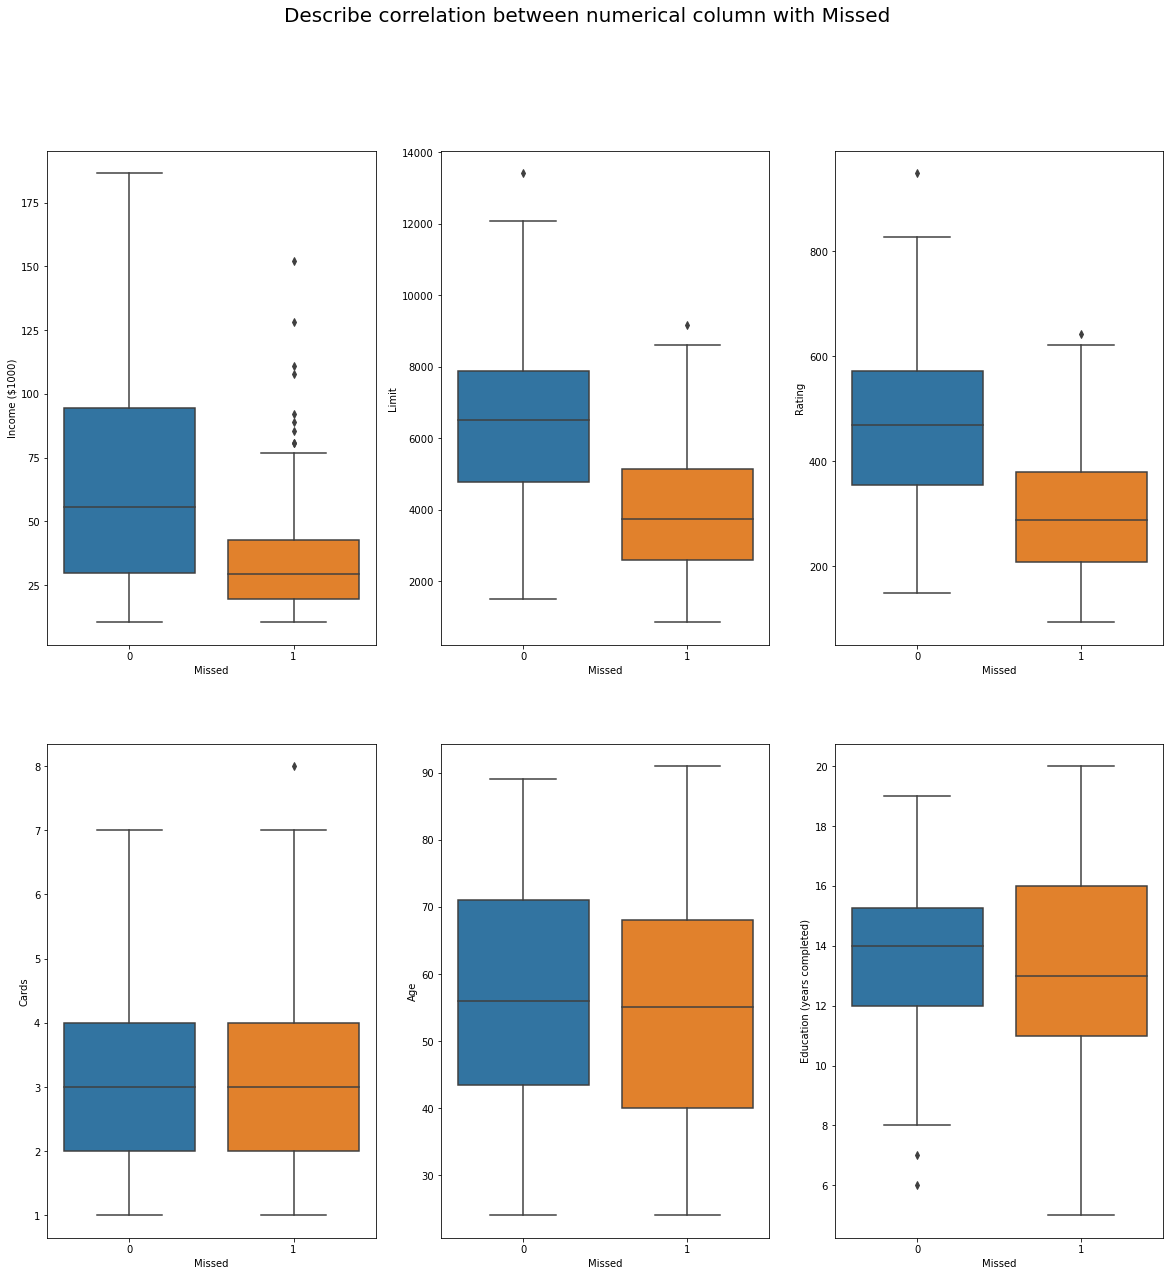

In [44]:
plt.figure(figsize=(20,20))
plt.suptitle('Describe correlation between numerical column with Missed',size=20)
for i in range(len(num.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x='Missed',y=num.columns[i],data=new_dt)

`Income`: The higher your income, the more you will get the card
<br>`Limit`:the higher your card limit, the more you will get the card
<br>`Rating`:the higher your rating, the more you will get the card
<br>`Cards`: it has any impact on missing card
<br>`Age`: it has any impact on missing card
<br>`Education (years completed)`:it has any impact on missing card

#### Summary Correlation with heat map

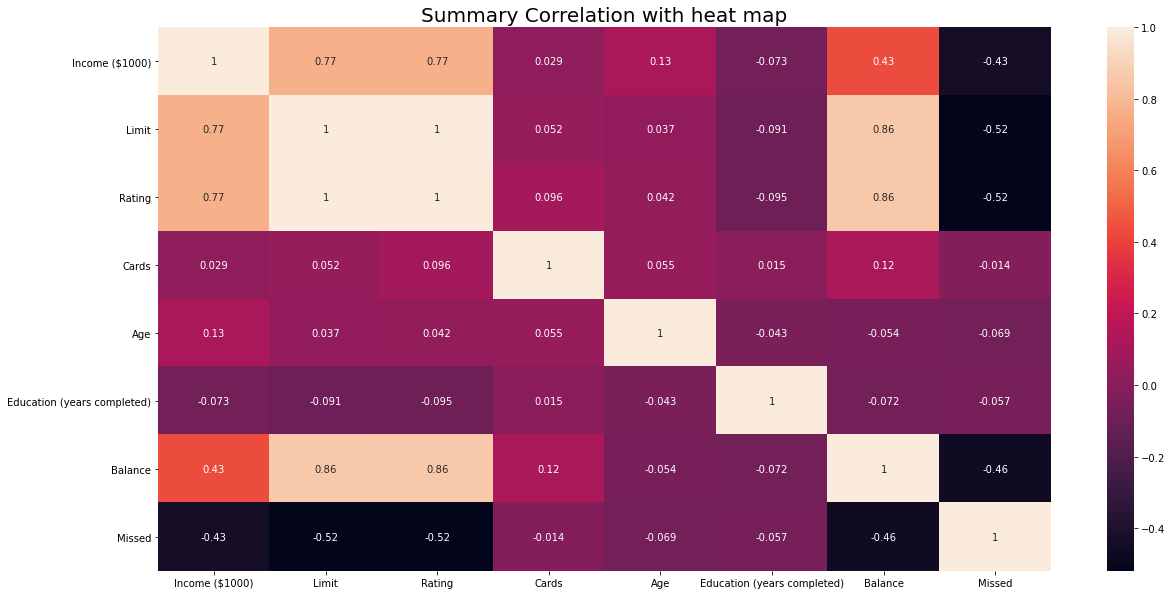

In [45]:
plt.figure(figsize=(20,10))
plt.title('Summary Correlation with heat map',size=20)
sns.heatmap(new_dt.corr(),annot=True)
plt.show()

In [52]:
new_dt.corr()['Missed'].sort_values()

Rating                        -0.519262
Limit                         -0.519018
Balance                       -0.457608
Income ($1000)                -0.434583
Age                           -0.068649
Education (years completed)   -0.056573
Cards                         -0.014370
Missed                         1.000000
Name: Missed, dtype: float64

we have there negative correlation with Missed:
- Rating
- Limit                         
- Balance                       
- Income 

# Preprocessing on data

#### convert data categorical to numerical

In [54]:
converted_columns=pd.get_dummies(cat)

In [55]:
converted_columns

Gender_ Male  Gender_Female  Student_No  Student_Yes  Married_No  \
0               1              0           1            0           0   
1               0              1           0            1           0   
2               1              0           1            0           1   
3               0              1           1            0           1   
4               1              0           1            0           0   
..            ...            ...         ...          ...         ...   
294             1              0           1            0           0   
295             0              1           1            0           0   
296             0              1           1            0           0   
297             1              0           1            0           0   
298             0              1           1            0           1   

     Married_Yes  Ethnicity_African American  Ethnicity_Asian  \
0              1                           0                0   
1              1                           0                1   
2              0                           0                1   
3              0                           0                1   
4              1                           0                0   
..           ...                         ...              ...   
294            1                           0                1   
295            1                           0                0   
296            1                           0                0   
297            1                           0                1   
298            0                           1                0   

     Ethnicity_Caucasian  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1  
..                   ...  
294                    0  
295                    1  
296                    1  
297                    0  
298                    0  

[299 rows x 9 columns]

In [56]:
new_dt1=new_dt.drop(columns=cat.columns)

In [57]:
new_dt2=pd.concat([new_dt1,converted_columns],axis=1)
new_dt2

Income ($1000)  Limit  Rating  Cards  Age  Education (years completed)  \
0            14.891   3606     283      2   34                           11   
1           106.025   6645     483      3   82                           15   
2           104.593   7075     514      4   71                           11   
3           148.924   9504     681      3   36                           11   
4            55.882   4897     357      2   68                           16   
..              ...    ...     ...    ...  ...                          ...   
294          42.915   2532     205      4   42                           13   
295          27.272   1389     149      5   67                           10   
296          65.896   5140     370      1   49                           17   
297          55.054   4381     321      3   74                           17   
298          20.791   2672     204      1   70                           18   

     Balance  Missed  Gender_ Male  Gender_Female  Student_No  Student_Yes  \
0        333       1             1              0           1            0   
1        903       0             0              1           0            1   
2        580       0             1              0           1            0   
3        964       0             0              1           1            0   
4        331       0             1              0           1            0   
..       ...     ...           ...            ...         ...          ...   
294        0       1             1              0           1            0   
295        0       1             0              1           1            0   
296      293       1             0              1           1            0   
297      188       0             1              0           1            0   
298        0       1             0              1           1            0   

     Married_No  Married_Yes  Ethnicity_African American  Ethnicity_Asian  \
0             0            1                           0                0   
1             0            1                           0                1   
2             1            0                           0                1   
3             1            0                           0                1   
4             0            1                           0                0   
..          ...          ...                         ...              ...   
294           0            1                           0                1   
295           0            1                           0                0   
296           0            1                           0                0   
297           0            1                           0                1   
298           1            0                           1                0   

     Ethnicity_Caucasian  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1  
..                   ...  
294                    0  
295                    1  
296                    1  
297                    0  
298                    0  

[299 rows x 17 columns]

In [58]:
show_columns(new_dt2)

Income ($1000)
Limit
Rating
Cards
Age
Education (years completed)
Balance
Missed
Gender_ Male
Gender_Female
Student_No
Student_Yes
Married_No
Married_Yes
Ethnicity_African American
Ethnicity_Asian
Ethnicity_Caucasian


In [59]:
new_dt2.drop(columns=['Missed','Balance'],inplace=True)

#### Normalize features by scalling 

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
Scaler=StandardScaler()

In [64]:
new_dt3=Scaler.fit_transform(new_dt2)
new_dt3

array([[-0.86356807, -0.45548022, -0.43109205, ..., -0.58893705,
        -0.60955692,  1.05856855],
       [ 1.82912563,  0.90083577,  0.89459469, ..., -0.58893705,
         1.6405359 , -0.94467193],
       [ 1.78681499,  1.09274623,  1.10007614, ..., -0.58893705,
         1.6405359 , -0.94467193],
       ...,
       [ 0.64345282,  0.22914917,  0.14558169, ..., -0.58893705,
        -0.60955692,  1.05856855],
       [ 0.32310932, -0.1095951 , -0.17921157, ..., -0.58893705,
         1.6405359 , -0.94467193],
       [-0.68924353, -0.87232758, -0.95473831, ...,  1.69797435,
        -0.60955692, -0.94467193]])

In [67]:
X=new_dt3
y=new_dt[['Balance']]

<a id='split'></a>
# Split data into train and test sets for model

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
print(f"Train set Size : {X_train.shape}")
print(f"Valid set Size : {X_valid.shape}")

Train set Size : (239, 15)
Valid set Size : (60, 15)


<a id='model'></a>
# Train the Model

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

### linear model: LinearRegression

In [85]:
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

#### Model Predict

In [104]:
y_valid_pred1=model1.predict(X_valid)
y_valid_pred1=np.round(y_valid_pred1).astype(int)

In [105]:
y_valid_pred1

array([[-202],
       [ 588],
       [ 588],
       [1237],
       [ 248],
       [ 411],
       [ 870],
       [ 409],
       [1107],
       [ 698],
       [ 253],
       [ 779],
       [1363],
       [ -68],
       [ 258],
       [ 635],
       [-216],
       [ 351],
       [ 279],
       [1327],
       [-171],
       [ 754],
       [-136],
       [1170],
       [ 468],
       [ 638],
       [ 548],
       [-156],
       [ 629],
       [ 575],
       [ 456],
       [ 258],
       [-158],
       [ -61],
       [1018],
       [ 904],
       [ 783],
       [-148],
       [  96],
       [ 135],
       [ 100],
       [ 591],
       [ -93],
       [ 577],
       [ 354],
       [ 176],
       [ 191],
       [ 853],
       [ 640],
       [ 498],
       [ 184],
       [ 303],
       [  15],
       [  62],
       [ 543],
       [ 620],
       [-152],
       [ 644],
       [ 764],
       [ 566]])

In [87]:
y_valid.values

array([[   0],
       [ 549],
       [ 548],
       [1350],
       [ 145],
       [ 250],
       [ 937],
       [ 297],
       [1151],
       [ 724],
       [ 155],
       [ 802],
       [1448],
       [   0],
       [ 133],
       [ 631],
       [   0],
       [ 227],
       [ 133],
       [1425],
       [   0],
       [ 745],
       [   0],
       [1241],
       [ 385],
       [ 529],
       [ 541],
       [   0],
       [ 637],
       [ 489],
       [ 368],
       [ 163],
       [   0],
       [   0],
       [ 997],
       [ 872],
       [ 768],
       [   0],
       [   0],
       [   0],
       [  29],
       [ 503],
       [   0],
       [ 532],
       [ 255],
       [  69],
       [  95],
       [ 863],
       [ 653],
       [ 453],
       [  68],
       [ 188],
       [   0],
       [   0],
       [ 531],
       [ 601],
       [   0],
       [ 671],
       [ 732],
       [ 531]], dtype=int64)

#### Model Evaluation

In [98]:
print(f"Train Accuracy = {round(model1.score(X_train,y_train),2)*100} %")
print(f"Valid Accuracy = {round(r2_score(y_valid,y_valid_pred1)*100,2)} %")

Train Accuracy = 96.0 %
Valid Accuracy = 94.28 %


In [110]:
print(f"Mean Absolute Error = {mean_absolute_error(y_valid,y_valid_pred1)}")

Mean Absolute Error = 80.51666666666667


_______

### Polymodel: SVR

In [131]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_valid_poly = poly_features.fit_transform(X_valid)

In [132]:
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression()

#### Model Predict

In [133]:
y_valid_pred2=model2.predict(X_valid_poly)
y_valid_pred2=np.round(y_valid_pred2).astype(int)

In [181]:
y_valid_pred2

array([[   5],
       [ 522],
       [ 460],
       [1339],
       [ 224],
       [ 332],
       [ 943],
       [ 298],
       [1125],
       [ 718],
       [ 199],
       [ 807],
       [1426],
       [ -48],
       [ 206],
       [ 497],
       [ -57],
       [ 286],
       [ 210],
       [1532],
       [ -42],
       [ 725],
       [ -56],
       [1254],
       [ 379],
       [ 526],
       [ 433],
       [ -35],
       [ 549],
       [ 500],
       [ 349],
       [ 215],
       [ -46],
       [  -6],
       [ 983],
       [ 831],
       [ 672],
       [  12],
       [  83],
       [ 134],
       [  48],
       [ 467],
       [ -51],
       [ 460],
       [ 337],
       [  93],
       [ 162],
       [ 850],
       [ 602],
       [ 466],
       [ 156],
       [ 272],
       [  51],
       [  70],
       [ 479],
       [ 551],
       [ -59],
       [ 612],
       [ 588],
       [ 486]])

In [135]:
y_valid.values

array([[   0],
       [ 549],
       [ 548],
       [1350],
       [ 145],
       [ 250],
       [ 937],
       [ 297],
       [1151],
       [ 724],
       [ 155],
       [ 802],
       [1448],
       [   0],
       [ 133],
       [ 631],
       [   0],
       [ 227],
       [ 133],
       [1425],
       [   0],
       [ 745],
       [   0],
       [1241],
       [ 385],
       [ 529],
       [ 541],
       [   0],
       [ 637],
       [ 489],
       [ 368],
       [ 163],
       [   0],
       [   0],
       [ 997],
       [ 872],
       [ 768],
       [   0],
       [   0],
       [   0],
       [  29],
       [ 503],
       [   0],
       [ 532],
       [ 255],
       [  69],
       [  95],
       [ 863],
       [ 653],
       [ 453],
       [  68],
       [ 188],
       [   0],
       [   0],
       [ 531],
       [ 601],
       [   0],
       [ 671],
       [ 732],
       [ 531]], dtype=int64)

#### Model Evaluation

In [137]:
print(f"Train Accuracy = {round(model2.score(X_train_poly,y_train),2)*100} %")
print(f"Valid Accuracy = {round(r2_score(y_valid,y_valid_pred2)*100,2)} %")

Train Accuracy = 99.0 %
Valid Accuracy = 97.71 %


In [138]:
print(f"Mean Absolute Error = {mean_absolute_error(y_valid,y_valid_pred2)}")

Mean Absolute Error = 49.53333333333333


<a id='con'> </a>
# Conclusions

- The data is displayed entirely from a file

- no missing data and no duplicated data

- Data were analyzed and visualized

- The relationship between the columns has been concluded

- The data is processed for training

- The data was divided into training data and validation data

- Two linear and non-linear models that are LinearRegression and polynomial regression were trained

- Then it was concluded that the best model was created from these two models, which are two models, as shown in the previous results

So we will save it Linear Regression model for predicting results of CreditCardApplications.csv

In [188]:
import joblib
joblib.dump(model1,'LinearRegression')

['LinearRegression']

Devise some rule that will allow you to choose who should or should not be approved for a new credit card based on what you have observed in your analysis. Be sure that your rule includes the individuals' balance.

from above analysis we found that there are negative correlation with Missed:
- Rating
- Limit                         
- Balance                       
- Income 

Missed column has two value 0 for got and 1 for missed

Rules for Got a card.
- if income with thouthand is greater than or equal 50
- if limit is greater than or equal 5000
- if Rating is greater than or equal 450
- if Balance is greater than or equal 750

### Using model To predict in Genaral 

In this dataset, you will find individual characteristcs but you will not find data on their outstanding balance. This dataset represents information for 50 people who are applying for a credit from a company with which they have not had a credit card before.

In [193]:
data2=pd.read_csv('CreditCardApplications.csv')

In [173]:
data2.head()

ID  Income ($1000)  Limit  Rating  Cards  Age  \
0  300          24.919   5051     372      3   76   
1  301          21.786   4632     355      1   50   
2  302          31.335   3526     289      3   38   
3  303          59.855   4964     365      1   46   
4  304          44.061   4970     352      1   79   

   Education (years completed)  Gender Student Married         Ethnicity  
0                           11  Female      No     Yes  African American  
1                           17    Male      No     Yes         Caucasian  
2                            7  Female      No      No         Caucasian  
3                           13  Female      No     Yes         Caucasian  
4                           11    Male      No     Yes  African American

In [147]:
data2.shape

(50, 11)

In [149]:
dt2=data2.drop(columns='ID')

In [153]:
cat1=dt2.select_dtypes('object')

In [154]:
converted_columns=pd.get_dummies(cat1)

In [155]:
dt3=dt2.drop(columns=cat1.columns)

In [156]:
dt4=pd.concat([dt3,converted_columns],axis=1)
show_columns(dt4)

Income ($1000)
Limit
Rating
Cards
Age
Education (years completed)
Gender_ Male
Gender_Female
Student_No
Student_Yes
Married_No
Married_Yes
Ethnicity_African American
Ethnicity_Asian
Ethnicity_Caucasian


In [174]:
dt4.shape

(50, 15)

In [158]:
dt5=Scaler.fit_transform(dt4)

#### Predict new file by Logistic Regression models 

In [189]:
LinearRegression=joblib.load('LinearRegression')

In [190]:
y_pred1=LinearRegression.predict(dt5)
y_pred1=np.round(y_pred1).astype(int)

In [191]:
y_pred1

array([[ 615],
       [ 536],
       [ 277],
       [ 341],
       [ 421],
       [ 804],
       [-106],
       [ 199],
       [  32],
       [ 617],
       [ 737],
       [ 991],
       [ 722],
       [ 716],
       [ 746],
       [ 988],
       [ 441],
       [ 977],
       [ 221],
       [-184],
       [  88],
       [ 264],
       [ 155],
       [ 335],
       [1662],
       [ 543],
       [ 634],
       [1159],
       [ 885],
       [ 211],
       [ 718],
       [1002],
       [ 438],
       [ 404],
       [ 236],
       [ 538],
       [ 270],
       [ 809],
       [-223],
       [ 544],
       [ 947],
       [ 362],
       [ 410],
       [ 295],
       [ 393],
       [ 634],
       [-241],
       [ 808],
       [1033],
       [-211]])

Store predict value as columns called Balance with new file

In [194]:
data2.head()

ID  Income ($1000)  Limit  Rating  Cards  Age  \
0  300          24.919   5051     372      3   76   
1  301          21.786   4632     355      1   50   
2  302          31.335   3526     289      3   38   
3  303          59.855   4964     365      1   46   
4  304          44.061   4970     352      1   79   

   Education (years completed)  Gender Student Married         Ethnicity  
0                           11  Female      No     Yes  African American  
1                           17    Male      No     Yes         Caucasian  
2                            7  Female      No      No         Caucasian  
3                           13  Female      No     Yes         Caucasian  
4                           11    Male      No     Yes  African American

#### Deploy your model to generate predicted card balance

In [195]:
data2['Balance']=y_pred1

In [199]:
data2.head()

ID  Income ($1000)  Limit  Rating  Cards  Age  \
0  300          24.919   5051     372      3   76   
1  301          21.786   4632     355      1   50   
2  302          31.335   3526     289      3   38   
3  303          59.855   4964     365      1   46   
4  304          44.061   4970     352      1   79   

   Education (years completed)  Gender Student Married         Ethnicity  \
0                           11  Female      No     Yes  African American   
1                           17    Male      No     Yes         Caucasian   
2                            7  Female      No      No         Caucasian   
3                           13  Female      No     Yes         Caucasian   
4                           11    Male      No     Yes  African American   

   Balance  
0      615  
1      536  
2      277  
3      341  
4      421

Apply your rule that you gave in question 3.2 and label who would be approved for a new credit card and who wouldnt. Report a dataset with these labels. What percentage of the applicants will you approve?

Rules for Got a card.
- if income with thouthand is greater than or equal 50
- if limit is greater than or equal 5000
- if Rating is greater than or equal 450
- if Balance is greater than or equal 750

Missed column has two value 0 for got and 1 for missed

In [208]:
Missed=[]

for i in range(len(data2)):
    if data2['Income ($1000)'][i]>=50 or data2['Limit'][i]>=5000 or data2['Rating'][i]>=450 or data2['Balance'][i]>=750:
        Missed.append(0)
    else:
        Missed.append(1)

In [210]:
data2['Missed']=Missed

In [212]:
data2.head()

ID  Income ($1000)  Limit  Rating  Cards  Age  \
0  300          24.919   5051     372      3   76   
1  301          21.786   4632     355      1   50   
2  302          31.335   3526     289      3   38   
3  303          59.855   4964     365      1   46   
4  304          44.061   4970     352      1   79   

   Education (years completed)  Gender Student Married         Ethnicity  \
0                           11  Female      No     Yes  African American   
1                           17    Male      No     Yes         Caucasian   
2                            7  Female      No      No         Caucasian   
3                           13  Female      No     Yes         Caucasian   
4                           11    Male      No     Yes  African American   

   Balance  Missed  
0      615       0  
1      536       1  
2      277       1  
3      341       0  
4      421       1

What percentage of the applicants will you approve?

In [213]:
miss_count1=data2['Missed'].value_counts()

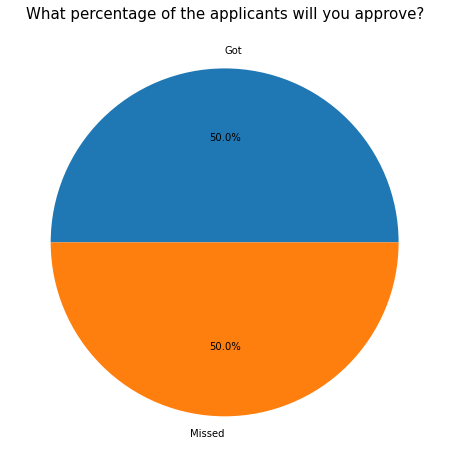

In [217]:
plt.figure(figsize=(16,8))
plt.title('What percentage of the applicants will you approve?',size=15)
plt.pie(miss_count1,labels=['Got','Missed'],autopct='%.01f%%')
plt.show()

Save new file with all predictions results 

In [218]:
data2.to_csv('PredicatFile.csv')